In [42]:
# Dependencies
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# File to Load 
tweets_file_to_load = "tTweets.csv"
spx_file_to_load = "spx_data.csv"
dji_file_to_load = "dji_data.csv"
fxchg_file_to_load = "exchangeRates.csv"
wkTwtStk_file_to_load = "WeeklyTweetsSTKDataset.csv"

# Read Trump Tweets file into Pandas dataframe
tweets_data = pd.read_csv(tweets_file_to_load)
tweets_data.head()

,source,id_str,created_at,Date,retweet_count,favorite_count,is_retweet
0,Twitter for iPhone,682792967736848000,1/1/2016 5:18,1/1/2016,9143,FALSE,NaN
1,Twitter for iPhone,682805320217980000,1/1/2016 6:07,1/1/2016,1948,8258,False
2,Twitter for Android,682805477168779000,1/1/2016 6:08,1/1/2016,2721,7490,False
3,Twitter for Android,683037464504745000,1/1/2016 21:29,1/1/2016,933,3330,False
4,Twitter for Android,683060169677344000,1/1/2016 23:00,1/1/2016,2642,8495,False


In [43]:
# Read S&P500 Index data into Pandas dataframe
spx_data = pd.read_csv(spx_file_to_load)
spx_data.head()

,Date,Open,High,Low,Close,Volume
0,12/31/2015,2060.59,2062.54,2043.62,2043.94,482631296.0
1,1/4/2016,2038.20,2038.20,1989.68,2012.66,802129536.0
2,1/5/2016,2013.78,2021.94,2004.17,2016.71,619318720.0
3,1/6/2016,2011.71,2011.71,1979.05,1990.26,734870208.0
4,1/7/2016,1985.32,1985.32,1938.83,1943.09,860961216.0


In [44]:
# Read Dow Jones Index data into Pandas dataframe
dji_data = pd.read_csv(dji_file_to_load)
dji_data.head()

,Date,Open,High,Low,Close,Volume
0,12/31/2015,17590.66,17590.66,17421.16,17425.03,93717456.0
1,1/4/2016,17405.48,17405.48,16957.63,17148.94,148086160.0
2,1/5/2016,17147.50,17195.84,17038.61,17158.66,105776304.0
3,1/6/2016,17154.83,17154.83,16817.62,16906.51,120277408.0
4,1/7/2016,16888.36,16888.36,16463.63,16514.10,176387328.0


In [45]:
# Read weekly Tweets & Stock data into Pandas dataframe
wkTwtStk_data = pd.read_csv(wkTwtStk_file_to_load)
wkTwtStk_data.head()
wkTwtStk_df = wkTwtStk_data.filter(["Week of", "Weekly#ofTweets", "SPBWeekChg(%)", "DJBWeekChg(%)"])
wkTwtStk_df = wkTwtStk_df.rename(columns={"Week of":"Week", "Weekly#ofTweets":"WTweets",
                                          "SPBWeekChg(%)":"SP_W%Chg", "DJBWeekChg(%)":"DJ_W%Chg"})
wkTwtStk_df.head()

,Week,WTweets,SP_W%Chg,DJ_W%Chg
0,12/26/2015 - 1/1/2016,12,0,0
1,1/2/2016 - 1/8/2016,86,-5.5%,-6.1%
2,1/9/2016 - 1/15/2016,80,-2.5%,-2.3%
3,1/16/2016 - 1/22/2016,104,0.7%,0.5%
4,1/23/2016 - 1/29/2016,136,1.6%,2.1%


In [46]:
# Extract 2019 weekly Tweets & Stock data into Pandas dataframe
WTS2019_df = wkTwtStk_df[wkTwtStk_df['Week'].str.contains('2019')].reset_index(drop=True)
WTS2019_df.head()

,Week,WTweets,SP_W%Chg,DJ_W%Chg
0,12/29/2018 - 1/4/2019,63,2.2%,2.2%
1,1/5/2019 - 1/11/2019,73,2.2%,1.9%
2,1/12/2019 - 1/18/2019,86,2.9%,2.7%
3,1/19/2019 - 1/25/2019,110,-0.7%,-0.8%
4,1/26/2019 - 2/1/2019,73,1.7%,1.1%


In [47]:
# Read Foreign exchange rates into pandas dataframe
fxchg_data = pd.read_csv(fxchg_file_to_load)
fxchg_data.head()

,Unnamed: 0,Date,USD,CNY
0,191,2018-12-31,1.1450,7.8751
1,171,2019-01-02,1.1397,7.8165
2,238,2019-01-03,1.1348,7.8019
3,29,2019-01-04,1.1403,7.8280
4,218,2019-01-07,1.1445,7.8421


In [48]:
### Data Munging Tweets Data

# Filter the dataframe to id and tweet date 
tweets_data = tweets_data.filter(["Date", "id_str"])

# Convert Date to pandas datetimestamp
tweets_data["Date"] = pd.to_datetime(tweets_data["Date"])

# Extract year from tweet date and append to dataframe
tweets_data["Year"] = tweets_data['Date'].apply(lambda x: x.year)

# Rename the columns
tweets_data = tweets_data.rename(columns={"Date":"Date", "id_str":"No of Tweets", "Year":"Year"})

# Group the tweets by Date, Year and create a new dataframe with the count
tweets_grouped = tweets_data.groupby(["Date", "Year"])
tweets_df = pd.DataFrame(tweets_grouped.count())

# Reset the index and make Date, Year as columns
tweets_df.reset_index(level=['Date','Year'], inplace=True)

# Extract 2019 Tweets
tweets2019_df = tweets_df[tweets_df['Year']==2019]
tweets2019_df.head()

,Date,Year,No of Tweets
1064,2019-01-01,2019,20
1065,2019-01-02,2019,3
1066,2019-01-03,2019,9
1067,2019-01-04,2019,7
1068,2019-01-05,2019,12


In [49]:
# Data Munging S&P 500 data
spx_data = spx_data.filter(["Date", "Open", "Close"])
spx_data.head()

# Convert Date to pandas datetimestamp
spx_data["Date"] = pd.to_datetime(spx_data["Date"])

# Extract year from spx date and append to dataframe
spx_data["Year"] = spx_data['Date'].apply(lambda x: x.year)
spx_data["SPX_%Change"] = spx_data['Close'].pct_change().fillna(0)
spx_data.head()

# Create new dataframe with filtered columns 
spx_df = spx_data.filter(["Date", "Year", "SPX_%Change"])
spx_df.head()


,Date,Year,SPX_%Change
0,2015-12-31,2015,0.000000
1,2016-01-04,2016,-0.015304
2,2016-01-05,2016,0.002012
3,2016-01-06,2016,-0.013115
4,2016-01-07,2016,-0.023700


In [50]:
# Data Munging Dow Jones data
# Data Munging S&P 500 data
dji_data = dji_data.filter(["Date", "Open", "Close"])
dji_data.head()

# Convert Date to pandas datetimestamp
dji_data["Date"] = pd.to_datetime(dji_data["Date"])

# Extract year from spx date and append to dataframe
dji_data["Year"] = dji_data['Date'].apply(lambda x: x.year)
dji_data["DJI_%Change"] = dji_data['Close'].pct_change().fillna(0)
dji_data.head()

# Create new dataframe with filtered columns 
dji_df = dji_data.filter(["Date", "Year", "DJI_%Change"])
dji_df.head()

,Date,Year,DJI_%Change
0,2015-12-31,2015,0.000000
1,2016-01-04,2016,-0.015844
2,2016-01-05,2016,0.000567
3,2016-01-06,2016,-0.014695
4,2016-01-07,2016,-0.023211


In [51]:
# Data Munging Foreign Exchange Rates for China
fxchg_data = fxchg_data.filter(["Date", "USD", "CNY"])
fxchg_data.head()

# Convert Date to pandas datetimestamp
fxchg_data["Date"] = pd.to_datetime(fxchg_data["Date"])

# Extract year from fxchg date and append to dataframe
fxchg_data["Year"] = fxchg_data['Date'].apply(lambda x: x.year)
fxchg_data.head()

# Create new dataframe with filtered columns 
fxchg_df = fxchg_data.filter(["Date", "Year", "CNY"])
fxchg_df.head()


,Date,Year,CNY
0,2018-12-31,2018,7.8751
1,2019-01-02,2019,7.8165
2,2019-01-03,2019,7.8019
3,2019-01-04,2019,7.8280
4,2019-01-07,2019,7.8421


In [52]:
# Merge all dataframes using a left join
merge_table = pd.merge(tweets_df, spx_df, on="Date", how="left")
merge_table = pd.merge(merge_table, dji_df, on="Date", how="left")
merge_df = merge_table.filter(["Date","Year_x","No of Tweets","SPX_%Change","DJI_%Change"])
# Rename columns
merge_df = merge_df.rename(columns={"Date":"Date","Year_x":"Year","No of Tweets":"No of Tweets",
                                    "SPX_%Change":"SP_D%Chg","DJI_%Change":"DJ_D%Chg"})
merge_df.head()

,Date,Year,No of Tweets,SP_D%Chg,DJ_D%Chg
0,2016-01-01,2016,12,NaN,NaN
1,2016-01-02,2016,11,NaN,NaN
2,2016-01-03,2016,18,NaN,NaN
3,2016-01-04,2016,1,-0.015304,-0.015844
4,2016-01-05,2016,12,0.002012,0.000567


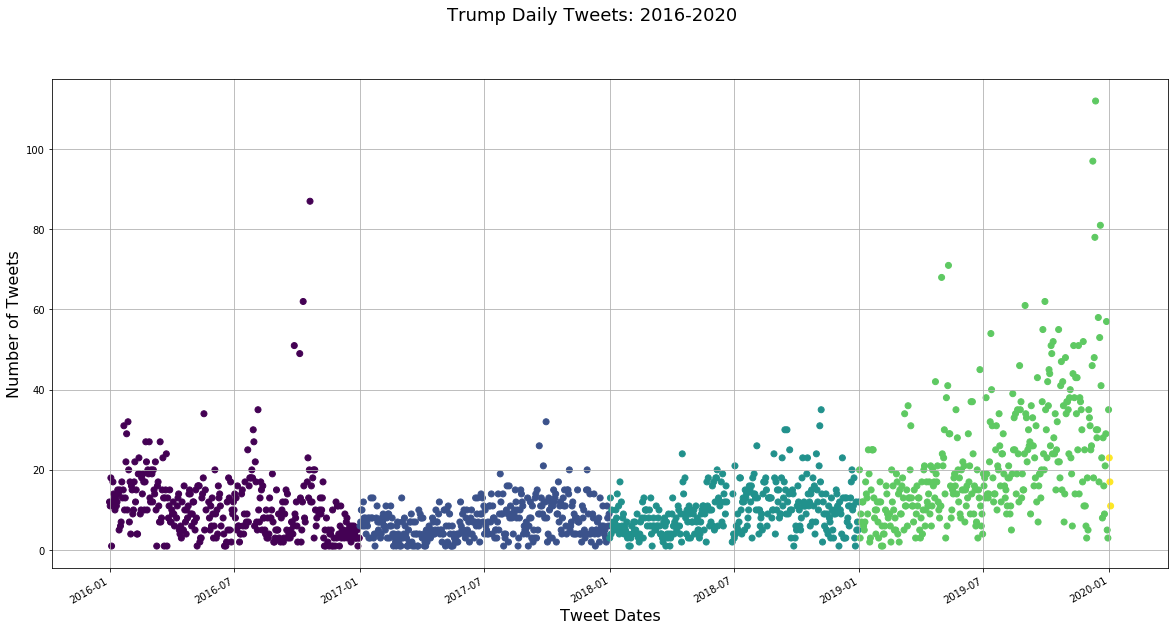

In [53]:
# Configure the plot 'Trump Tweets 2016-2020'

# Function to apply different color to years 
def dfScatter(df, xcol='Date', ycol='No of Tweets', catcol='Year'):
    fig, ax = plt.subplots(figsize=(20,10))
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x]) 
    ax.scatter(df[xcol], df[ycol], c=df.Color)
    fig.suptitle('Trump Daily Tweets: 2016-2020', fontsize=18)
    ax.set_xlabel('Tweet Dates', fontsize=16)
    ax.set_ylabel('Number of Tweets', fontsize=16)
    ax.grid()
    fig.autofmt_xdate()
#    fig.tight_layout()
    return fig

fig = dfScatter(merge_df) 
fig.savefig('d_tweets.png')

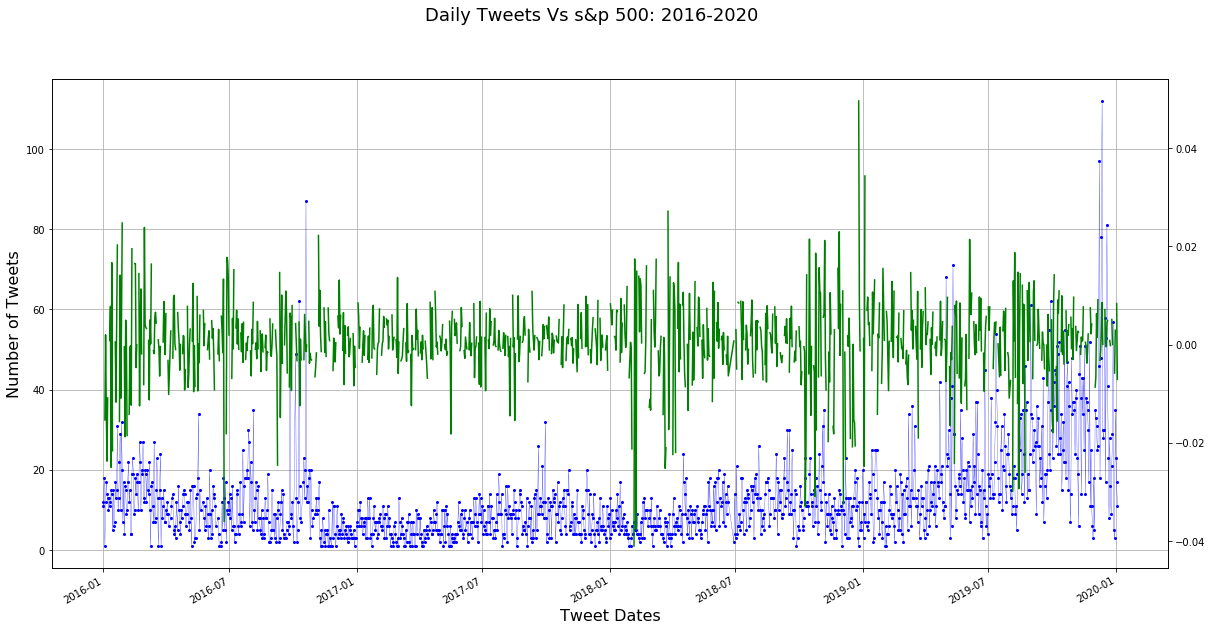

In [54]:
# Configure the plot 'Daily Tweets Vs s&p 500'

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax.plot(merge_df['Date'], merge_df['No of Tweets'], 'bo-', linewidth=0.25, markersize=2)
ax2.plot(merge_df['Date'], merge_df['SP_D%Chg'], 'g-')
fig.suptitle('Daily Tweets Vs s&p 500: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('d_tVSsp500.png')

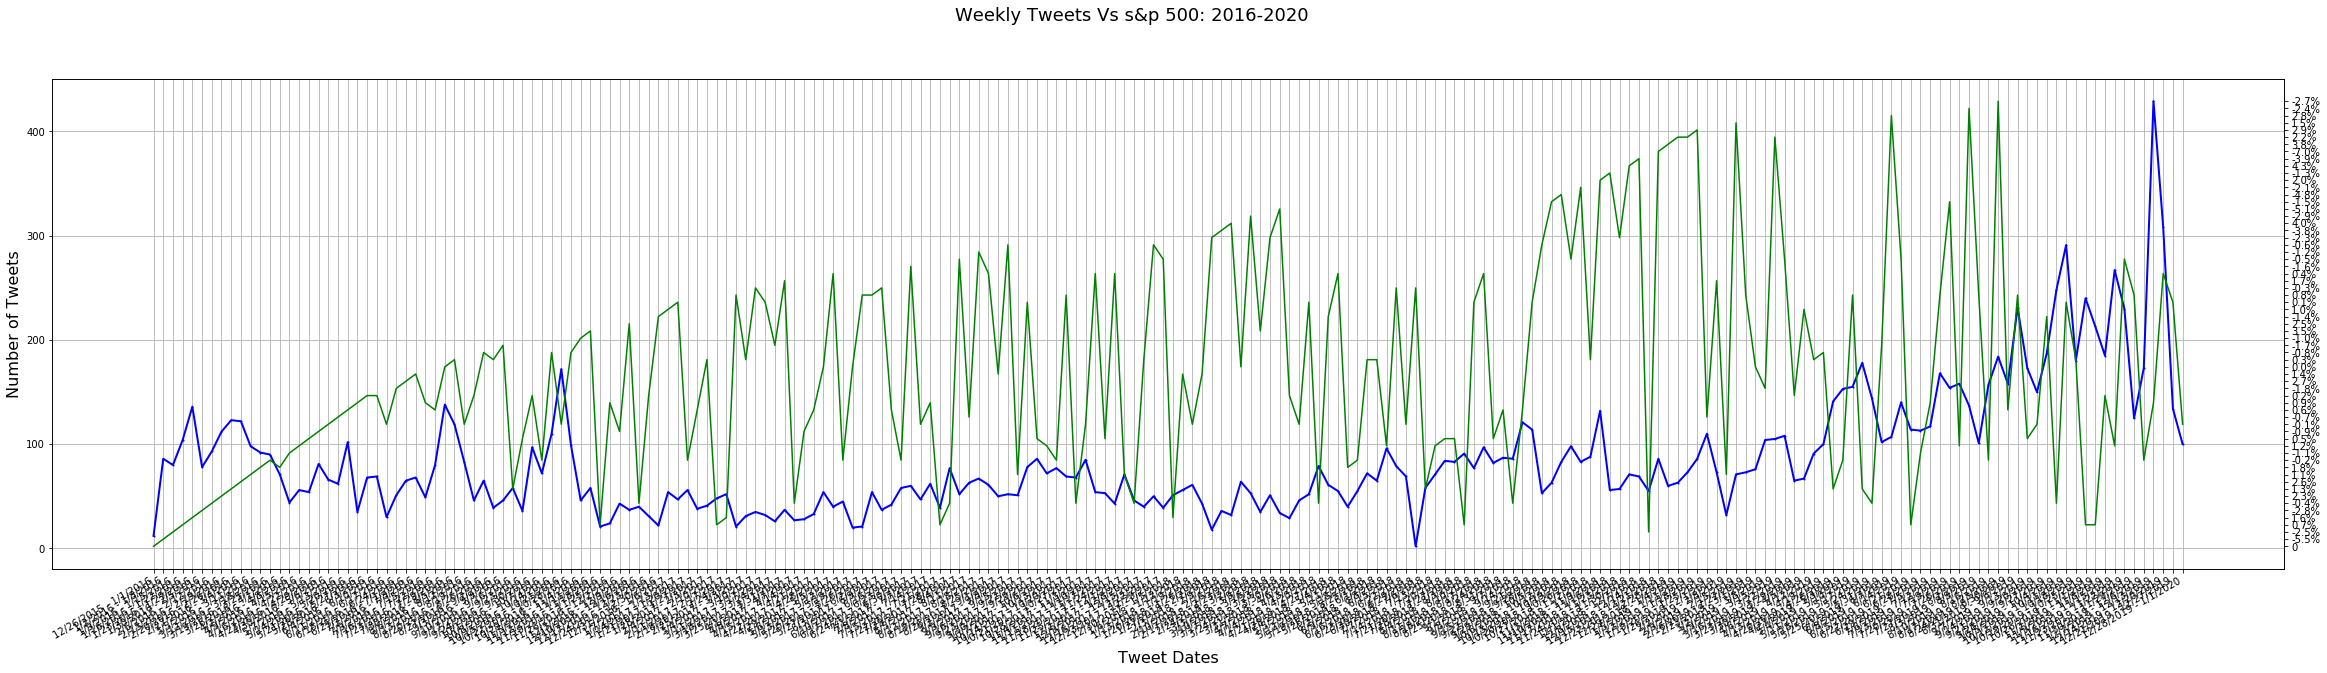

In [55]:
# Configure the plot 'Weekly Tweets Vs s&p 500'

fig, ax = plt.subplots(figsize=(40,10))
ax2 = ax.twinx()
ax.plot(wkTwtStk_df['Week'], wkTwtStk_df['WTweets'], 'bo-', linewidth=2, markersize=1) 
ax2.plot(wkTwtStk_df['Week'], wkTwtStk_df['SP_W%Chg'], 'g-')      
fig.suptitle('Weekly Tweets Vs s&p 500: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w_tVSsp500.png')

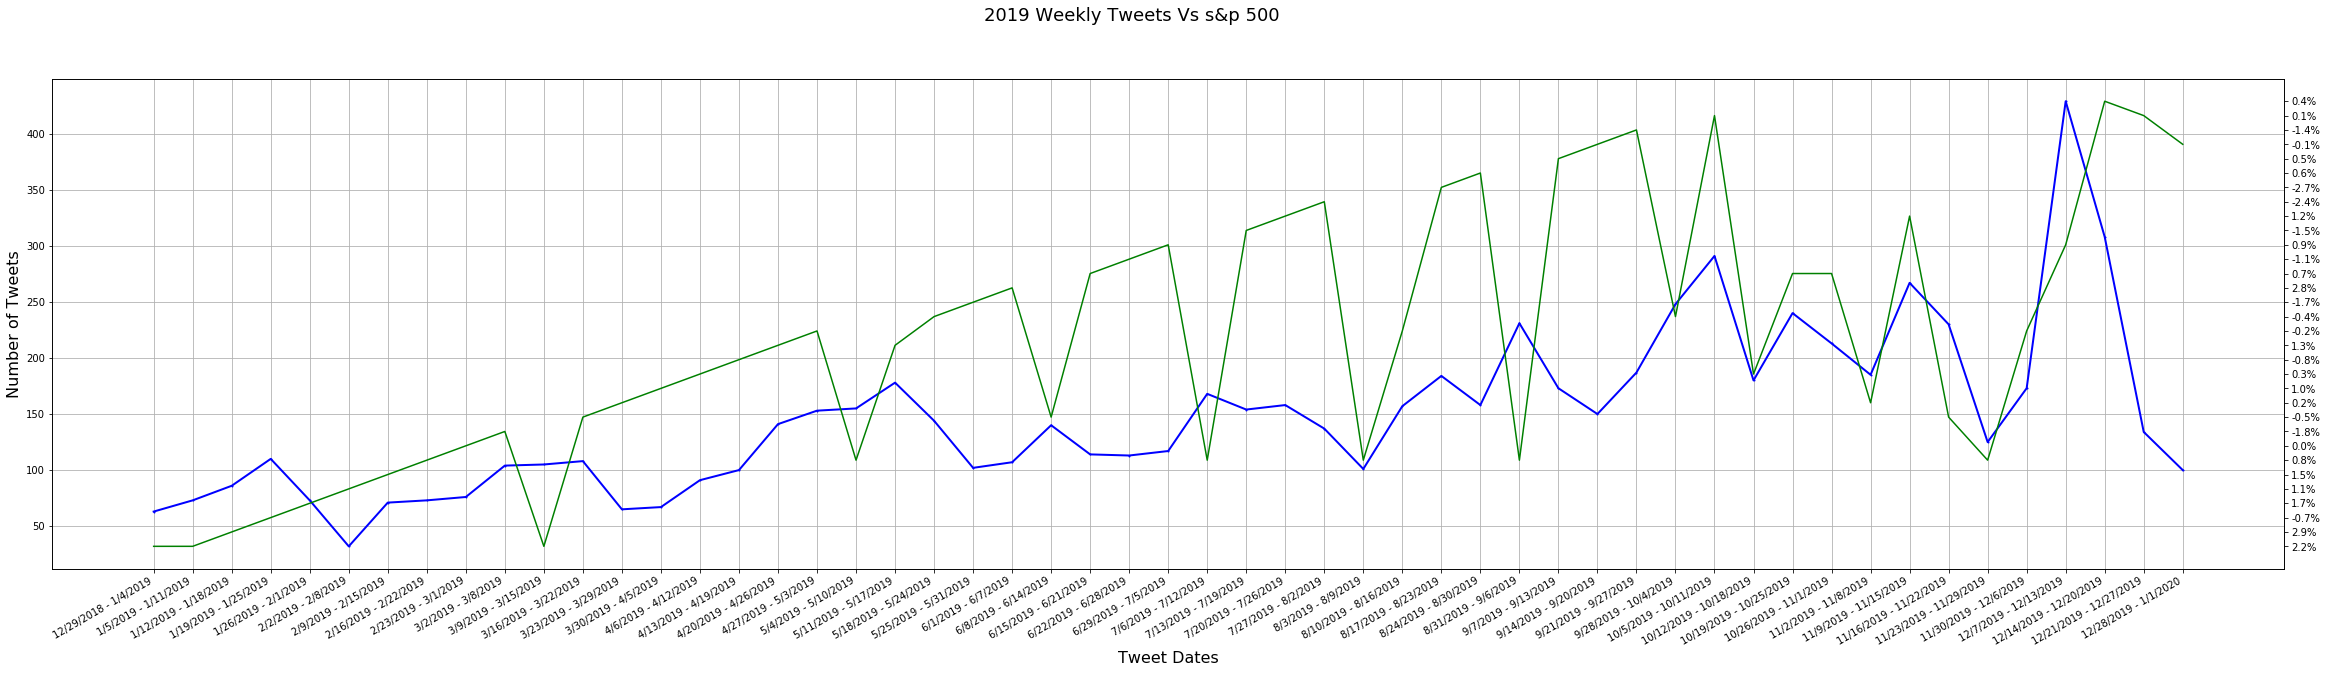

In [56]:
# Configure the plot '2019 Weekly Tweets Vs s&p 500'

fig, ax = plt.subplots(figsize=(40,10))
ax2 = ax.twinx()
ax.plot(WTS2019_df['Week'], WTS2019_df['WTweets'], 'bo-', linewidth=2, markersize=1) 
ax2.plot(WTS2019_df['Week'], WTS2019_df['SP_W%Chg'], 'g-')      
fig.suptitle('2019 Weekly Tweets Vs s&p 500', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w2019_tVSsp500.png')

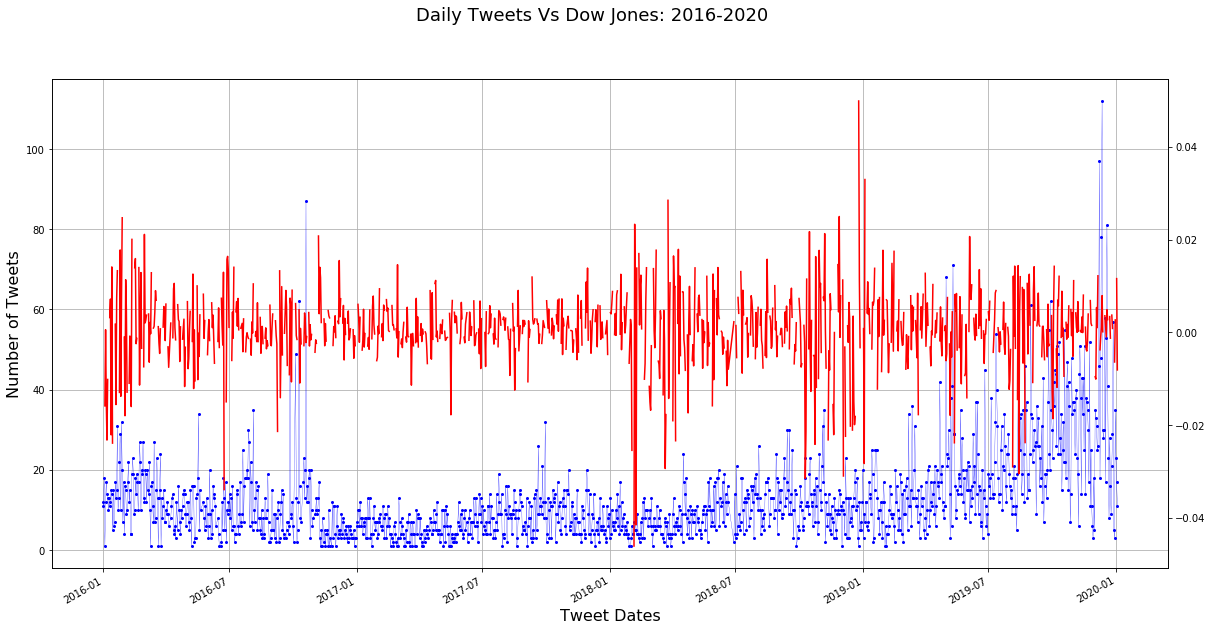

In [57]:
# Configure the plot 'Daily Tweets Vs Dow Jones'

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax.plot(merge_df['Date'], merge_df['No of Tweets'], 'bo-', linewidth=0.25, markersize=2)  
ax2.plot(merge_df['Date'], merge_df['DJ_D%Chg'], 'r-')   
fig.suptitle('Daily Tweets Vs Dow Jones: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('d_tVSdj.png')

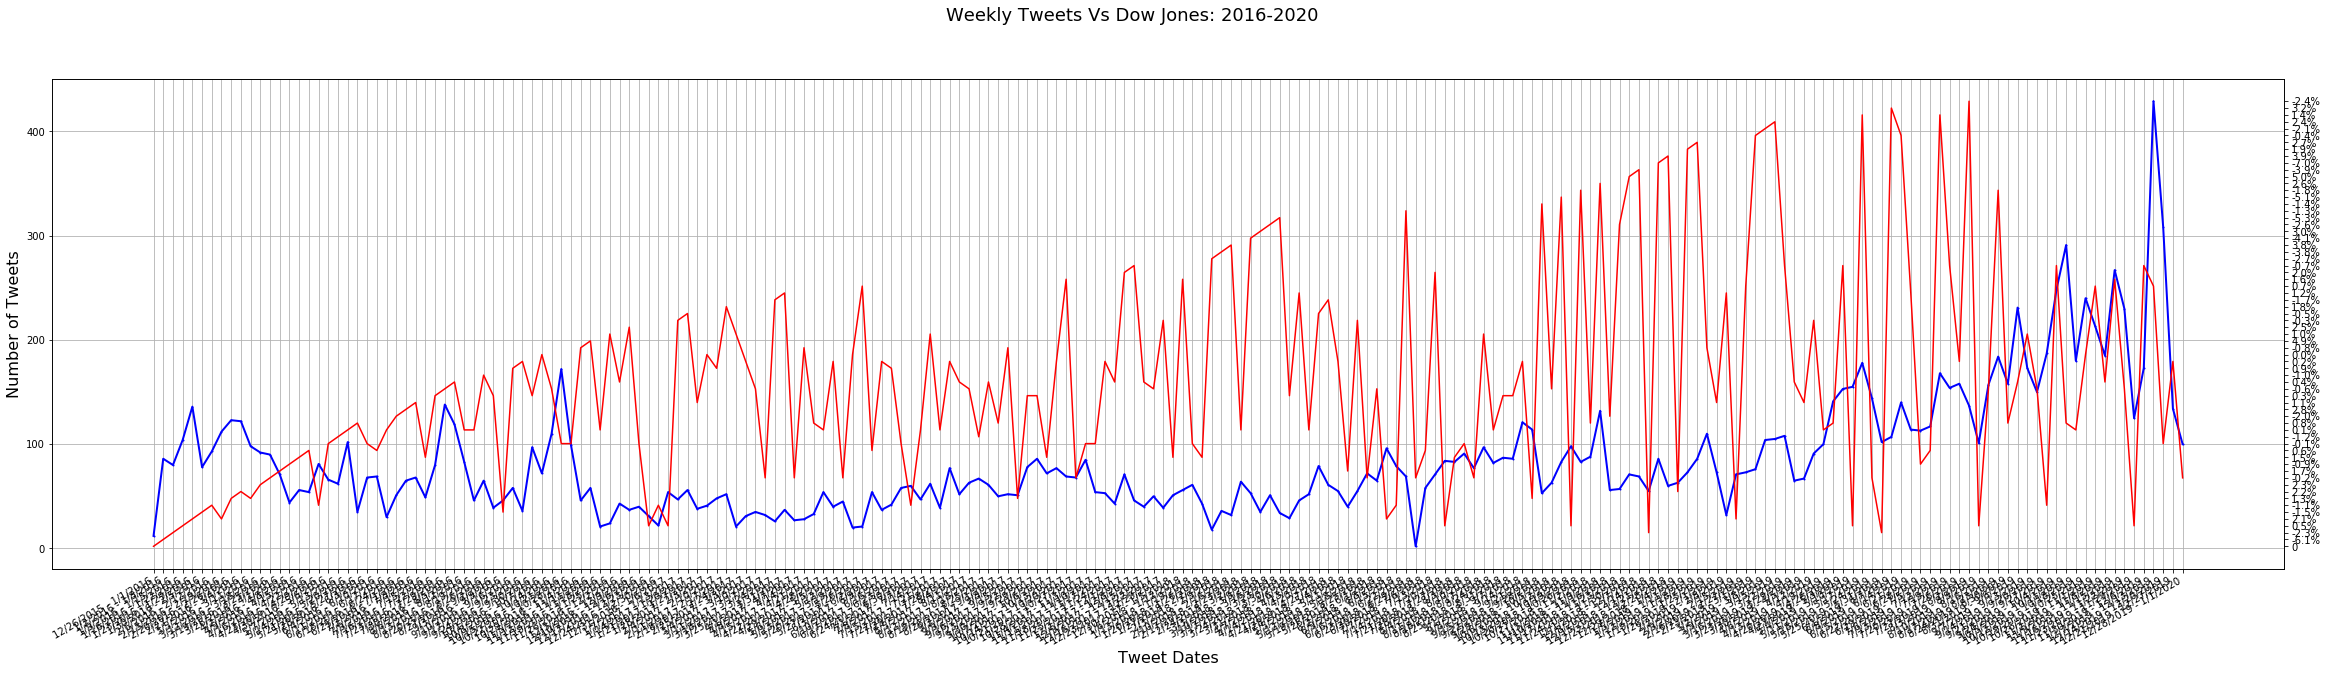

In [58]:
# Configure the plot 'Weekly Tweets Vs Dow Jones'

fig, ax = plt.subplots(figsize=(40,10))
ax2 = ax.twinx()
ax.plot(wkTwtStk_df['Week'], wkTwtStk_df['WTweets'], 'bo-', linewidth=2, markersize=1)  
ax2.plot(wkTwtStk_df['Week'], wkTwtStk_df['DJ_W%Chg'], 'r-')
fig.suptitle('Weekly Tweets Vs Dow Jones: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w_tVSdj.png')

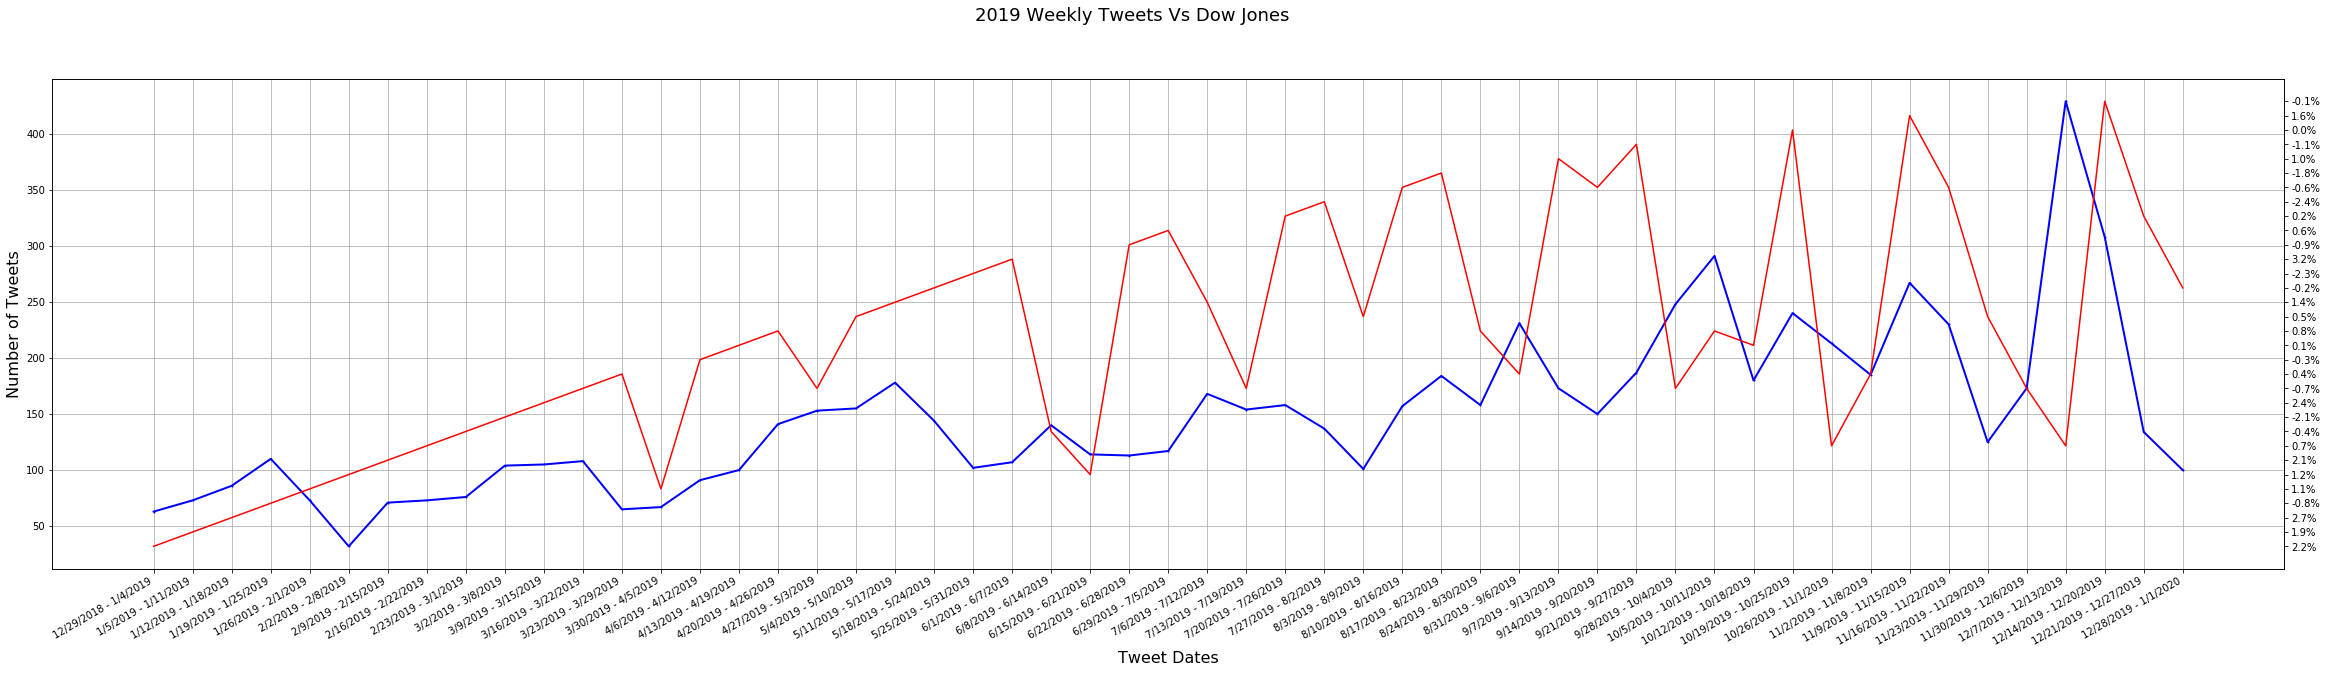

In [59]:
# Configure the plot '2019 Weekly Tweets Vs Dow Jones'

fig, ax = plt.subplots(figsize=(40,10))
ax2 = ax.twinx()
ax.plot(WTS2019_df['Week'], WTS2019_df['WTweets'], 'bo-', linewidth=2, markersize=1)
ax2.plot(WTS2019_df['Week'], WTS2019_df['DJ_W%Chg'], 'r-')  
fig.suptitle('2019 Weekly Tweets Vs Dow Jones', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w2019_tVSdj.png')

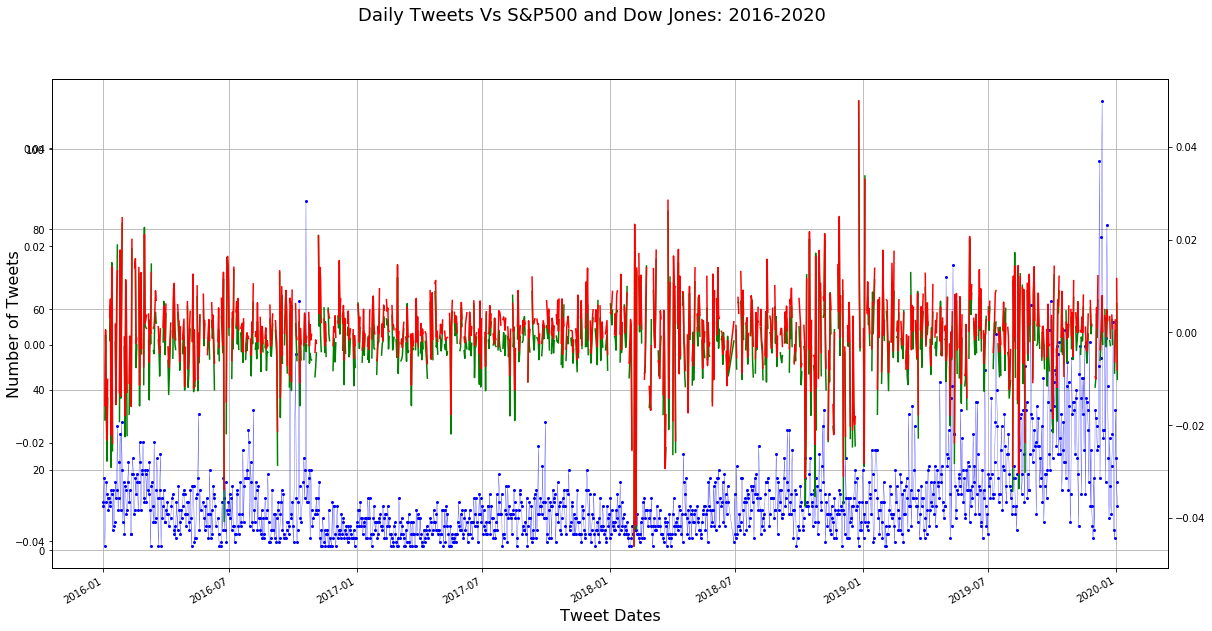

In [60]:
# Configure the plot 'Daily Tweets Vs S&P500 and Dow Jones'

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax3 = ax2.twinx()
ax.plot(merge_df['Date'], merge_df['No of Tweets'], 'bo-', linewidth=0.25, markersize=2)
ax2.plot(merge_df['Date'], merge_df['SP_D%Chg'], 'g-')
ax3.plot(merge_df['Date'], merge_df['DJ_D%Chg'], 'r-')
fig.suptitle('Daily Tweets Vs S&P500 and Dow Jones: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('d_tVSsp500dj.png')

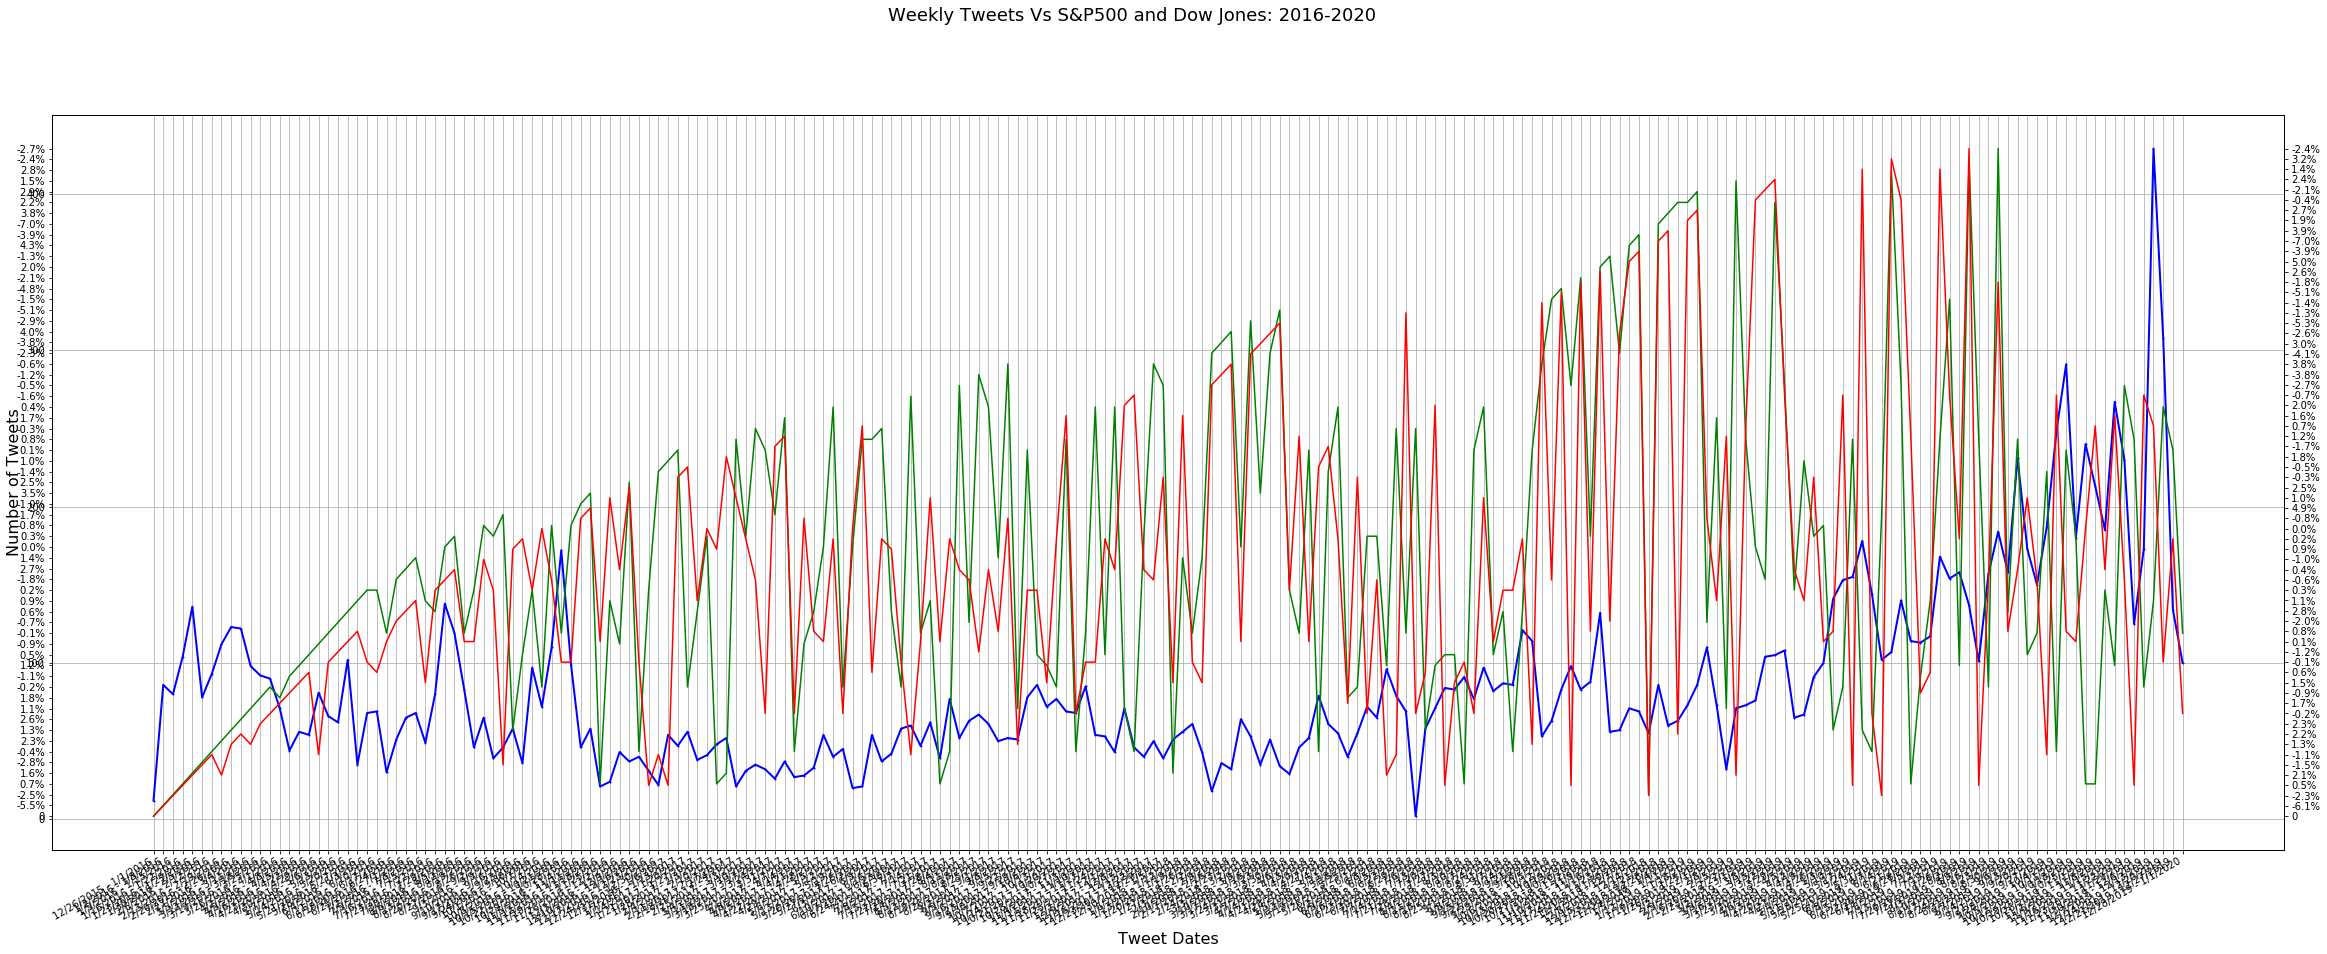

In [61]:
# Configure the plot 'Weekly Tweets Vs S&P500 and Dow Jones'

fig, ax = plt.subplots(figsize=(40,15))
ax2 = ax.twinx()
ax3 = ax2.twinx()
ax.plot(wkTwtStk_df['Week'], wkTwtStk_df['WTweets'], 'bo-', linewidth=2, markersize=1)
ax2.plot(wkTwtStk_df['Week'], wkTwtStk_df['SP_W%Chg'], 'g-')
ax3.plot(wkTwtStk_df['Week'], wkTwtStk_df['DJ_W%Chg'], 'r-')
fig.suptitle('Weekly Tweets Vs S&P500 and Dow Jones: 2016-2020', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w_tVSsp500dj.png')

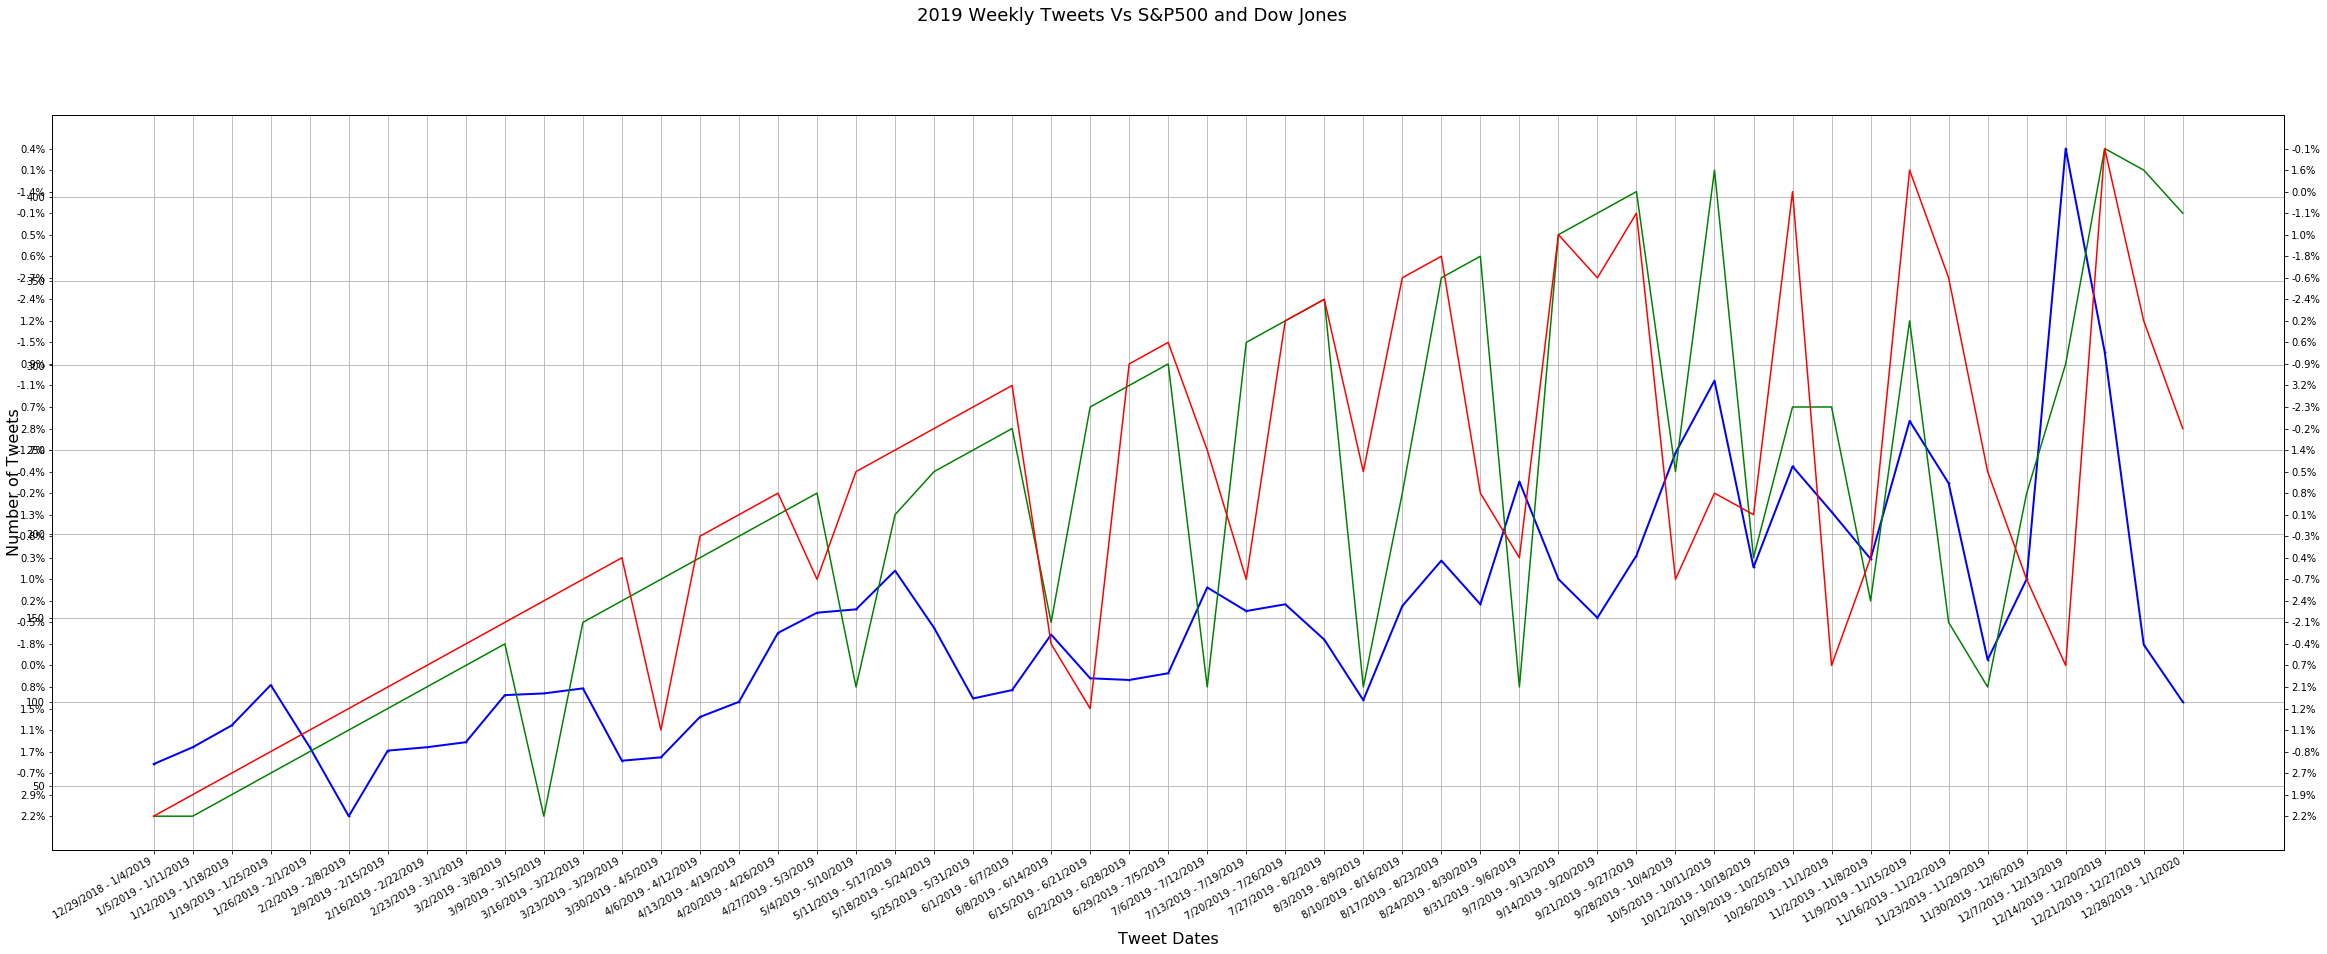

In [62]:
# Configure the plot '2019 Weekly Tweets Vs S&P500 and Dow Jones'

fig, ax = plt.subplots(figsize=(40,15))
ax2 = ax.twinx()
ax3 = ax2.twinx()
ax.plot(WTS2019_df['Week'], WTS2019_df['WTweets'], 'bo-', linewidth=2, markersize=1)
ax2.plot(WTS2019_df['Week'], WTS2019_df['SP_W%Chg'], 'g-')
ax3.plot(WTS2019_df['Week'], WTS2019_df['DJ_W%Chg'], 'r-')
fig.suptitle('2019 Weekly Tweets Vs S&P500 and Dow Jones', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('w2019_tVSsp500dj.png')

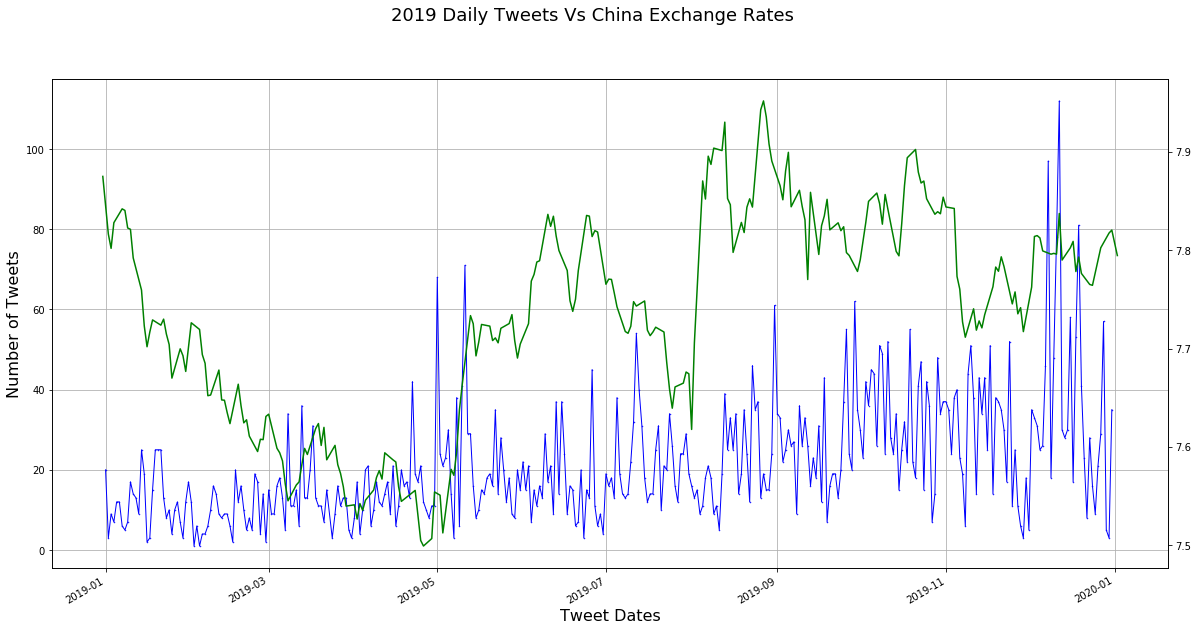

In [63]:
# Configure the plot '2019 Daily Tweets Vs China Exchange Rates'

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax.plot(tweets2019_df['Date'], tweets2019_df['No of Tweets'], 'bo-', linewidth=1, markersize=0.5)
ax2.plot(fxchg_df['Date'], fxchg_df['CNY'], 'g-')
fig.suptitle('2019 Daily Tweets Vs China Exchange Rates', fontsize=18)
ax.set_xlabel('Tweet Dates', fontsize=16)
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.grid()
fig.autofmt_xdate()
fig.savefig('d2019_tVScny.png')